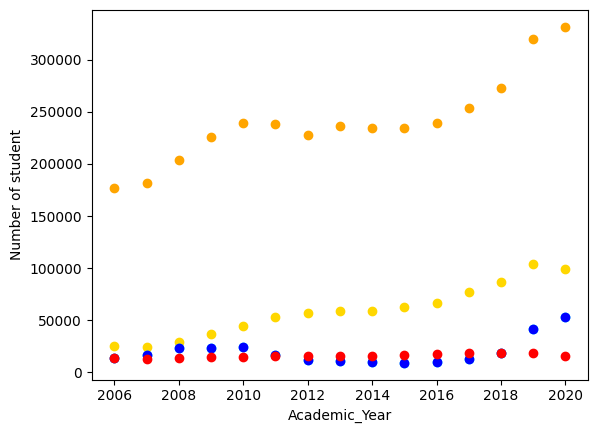

               Academic_Year     China     India        EU  North_America  \
Academic_Year       1.000000  0.976302  0.388615  0.551429       0.824025   
China               0.976302  1.000000  0.499246  0.557479       0.797242   
India               0.388615  0.499246  1.000000  0.524428      -0.008969   
EU                  0.551429  0.557479  0.524428  1.000000       0.463045   
North_America       0.824025  0.797242 -0.008969  0.463045       1.000000   
Total               0.893027  0.943987  0.718454  0.678095       0.613841   

                  Total  
Academic_Year  0.893027  
China          0.943987  
India          0.718454  
EU             0.678095  
North_America  0.613841  
Total          1.000000  


/Users/andy/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


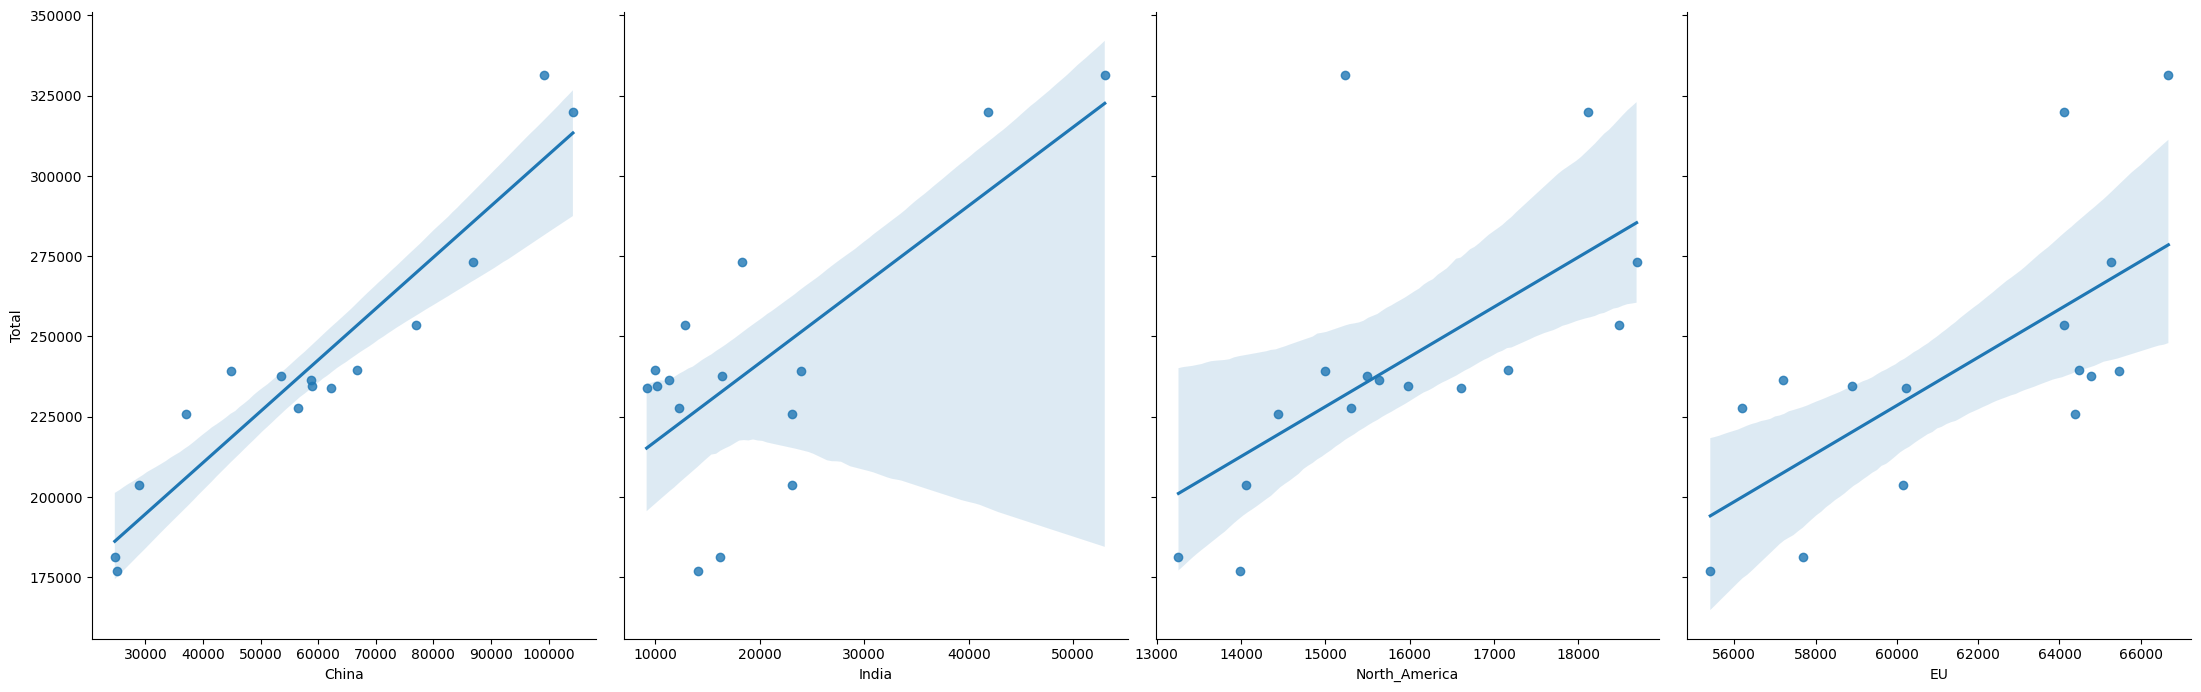

Independent variable---source data: (15, 4) ；  Training dataset: (12, 4) ；  Testing dataset: (3, 4)
Dependent variable---source data: (15, 1) ；  Training dataset: (12, 1) ；  Testing dataset: (3, 1)
Parameter:intercept [94063.97533102] ,coefficient： [[ 1.63963522  0.39454482 -5.16644391  2.02567934]]
Best regression function: Y =  94063.98 + 1.64 * X1 +  0.39 * X2  -5.17 * X3 + 2.03 * X4 


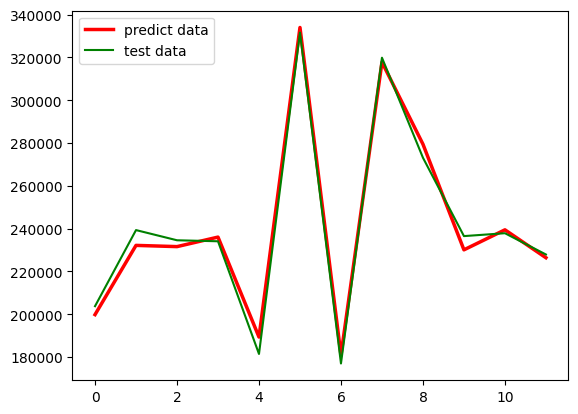

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


#read in the data
data = pd.read_csv('data5.csv')

plt.scatter(data.Academic_Year,data.China,color = 'gold',label = "China")
plt.scatter(data.Academic_Year,data.India,color = 'cyan',label = "India")
plt.scatter(data.Academic_Year,data.India,color = 'blue',label = "EU")
plt.scatter(data.Academic_Year,data.North_America,color = 'red',label = "North_America")
plt.scatter(data.Academic_Year,data.Total,color = 'Orange',label = "Total")
plt.xlabel("Academic_Year")
plt.ylabel("Number of student")
plt.show()

data_X=data[["China","India","North_America", "EU"]] 
data_Y= data[["Total"]]

# Corellation coefficient
rDF = data.corr(method = "pearson")
print(rDF)
sns.pairplot(data, x_vars=['China','India','North_America','EU'], y_vars="Total", size=7, aspect=0.8, kind='reg')  
plt.show()

X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,train_size=0.8)
print("Independent variable---source data:",data_X.shape, "；  Training dataset:",X_train.shape, "；  Testing dataset:",X_test.shape)
print("Dependent variable---source data:",data_Y.shape, "；  Training dataset:",Y_train.shape, "；  Testing dataset:",Y_test.shape)

# Train
model = LinearRegression()
model.fit(X_train,Y_train)

a  = model.intercept_#intercept
b = model.coef_#coefficient
print("Parameter:intercept",a,",coefficient：",b)

Y_pred = model.predict(X_train)

plt.plot(range(len(Y_train)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_train)),Y_train,'green',label="test data")
plt.legend(loc=2)

print("Best regression function: Y = ",np.round(a[0],2),"+",np.round(b[0][0],2),"* X1 + ",np.round(b[0][1],2),"* X2 ", np.round(b[0][2],2),"* X3 +", np.round(b[0][3],2),"* X4 ")



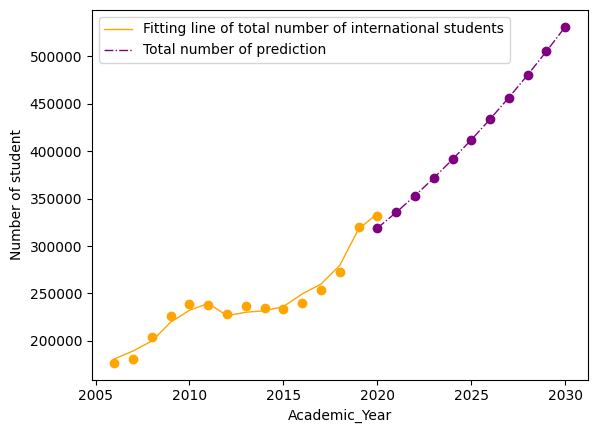

In [10]:
# Data from polynomial regression prediction
X_value = pd.DataFrame({

'Academic_Year':[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030],

'China':[101067.20686376, 108424.22432804, 116033.06552267, 123893.73044771,
 132006.21910316, 140370.5314889,  148986.66760504, 157854.62745148,
 166974.41102839, 176346.01833564 ,185969.44937325],

 'India': [41230.09163022,  49214.20290041,  58118.6909101,   67943.55565906,
  78688.79714727,  90354.41537499, 102940.41034198, 116446.78204846,
 130873.53049397, 146220.65567923, 162488.15760422],

 'North_America': [17429.5951744,  17459.74604526, 17452.72657706, 17408.53676988,
 17327.17662366, 17208.64613844, 17052.94531418, 16860.07415089,
 16630.03264861, 16362.82080729, 16058.43862699],

 'EU': [65542.00946811, 66291.14902525, 67077.05491096, 67899.72712523,
 68759.16566809, 69655.37053952, 70588.34173951, 71558.0792681,
 72564.58312525, 73607.85331099, 74687.8898253 ]
})
future_10years = pd.DataFrame({'Academic_Year':[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]})

Y_pred_10years = np.round(a[0],2) + np.round(b[0][0],2) * X_value.China + np.round(b[0][1],2) * X_value.India + np.round(b[0][2],2) * X_value.North_America + np.round(b[0][3],2) * X_value.EU
Y_pred_10years 

plt.scatter(data.Academic_Year,data.Total,color = 'Orange')
plt.plot(data.Academic_Year, np.round(a[0],2) + np.round(b[0][0],2) * data_X.China + np.round(b[0][1],2) * data_X.India + np.round(b[0][2],2) * data_X.North_America + np.round(b[0][3],2) * data_X.EU, color = 'orange', linewidth = 1, label = 'Fitting line of total number of international students')
plt.scatter(future_10years,Y_pred_10years,color = 'purple')
plt.plot(future_10years, Y_pred_10years, color = 'purple', linewidth = 1, label = 'Total number of prediction',linestyle = '-.')
plt.legend(loc=2)
plt.xlabel("Academic_Year")
plt.ylabel("Number of student")
plt.show()